In [1]:
import os
import os.path as p

import librosa
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from utils import play_wave

%matplotlib inline
matplotlib.style.use('ggplot')

# Data

In order to be consistent with the sample used in the YouTube videos, will use only the audio files as in `instruments.csv` which is a copy of the file in Seth's repo. 

In [2]:
audio_data = pd.read_csv('instruments.csv')
audio_data.head()

fname      label
0  5388d14d.wav  Saxophone
1  c685f05f.wav  Saxophone
2  36d20ab5.wav  Saxophone
3  d6665734.wav  Saxophone
4  7352e28f.wav  Saxophone

In [3]:
data_dir = r'../../data/freesound-audio-tagging/'

In [4]:
! ls {data_dir}

audio_test                 test_post_competition.csv
audio_train                train.csv
sample_submission.csv      train_post_competition.csv


In [5]:
train_data_dir = p.join(data_dir, 'audio_train')

# Label distribution

In [6]:
audio_data.label.value_counts(dropna=False)

Violin_or_fiddle    30
Snare_drum          30
Double_bass         30
Hi-hat              30
Acoustic_guitar     30
Clarinet            30
Flute               30
Cello               30
Bass_drum           30
Saxophone           30
Name: label, dtype: int64

#  Play a random audio for each label

In [7]:
def play_random_audio(instrument):
    print(f"---> {instrument}")
    file_to_play = audio_data[audio_data.label == instrument].sample(1).fname.values
    signal, rate = librosa.load(p.join(train_data_dir, file_to_play[0]), sr=None)
    play_wave(signal, rate)

In [8]:
for instrument in np.unique(audio_data.label):
    play_random_audio(instrument)

---> Acoustic_guitar


---> Bass_drum


---> Cello


---> Clarinet


---> Double_bass


---> Flute


---> Hi-hat


---> Saxophone


---> Snare_drum


---> Violin_or_fiddle


# Average recording length per label

In [9]:
def calculate_audio_file_length(row):
    file_path = p.join(train_data_dir, row.fname)
    signal, rate = librosa.load(file_path, sr=None)
    return signal.shape[0] / rate

audio_data['length'] = audio_data.apply(calculate_audio_file_length, axis=1)

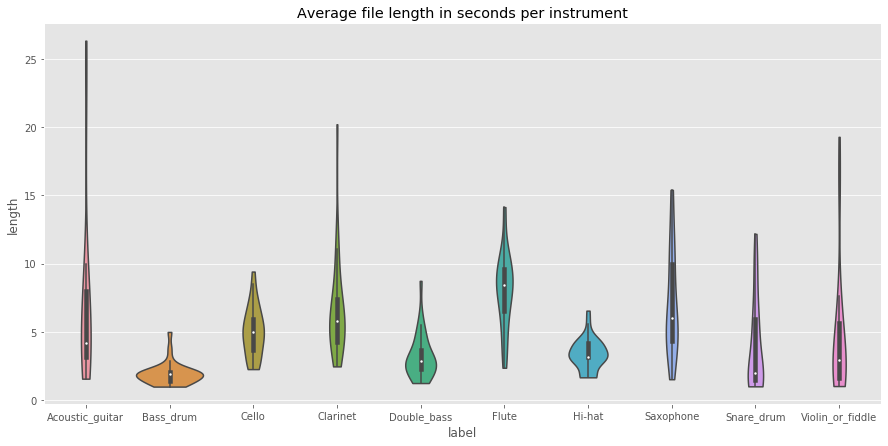

In [10]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.violinplot(ax=ax, x="label", y="length", data=audio_data, cut=0, order=np.unique(audio_data.label))
plt.title('Average file length in seconds per instrument')
plt.show()

> **Bass drum** recording are significantly shorter compared to the rest of the instruments - about 2 seconds. Conversely, the average duration of **flute** audio files is a little above 8 seconds.

# Explore the waveform of random recordings

In [11]:
def plot_random_wave(instrument):
    file_to_play = audio_data[audio_data.label == instrument].sample(1).fname.values
    signal, rate = librosa.load(p.join(train_data_dir, file_to_play[0]), sr=None)

    plt.figure(figsize=(15, 7))
    
    plt.subplot(121)
    plt.plot(signal[:rate])
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.xlim(0, rate)
    plt.ylim(-1, 1)
    
    plt.subplot(122)
    plt.plot(signal[25000:25500])

    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.xlim(0, 500)

    plt.suptitle(f'Waveform of a {instrument.lower()} recording')
    plt.show()

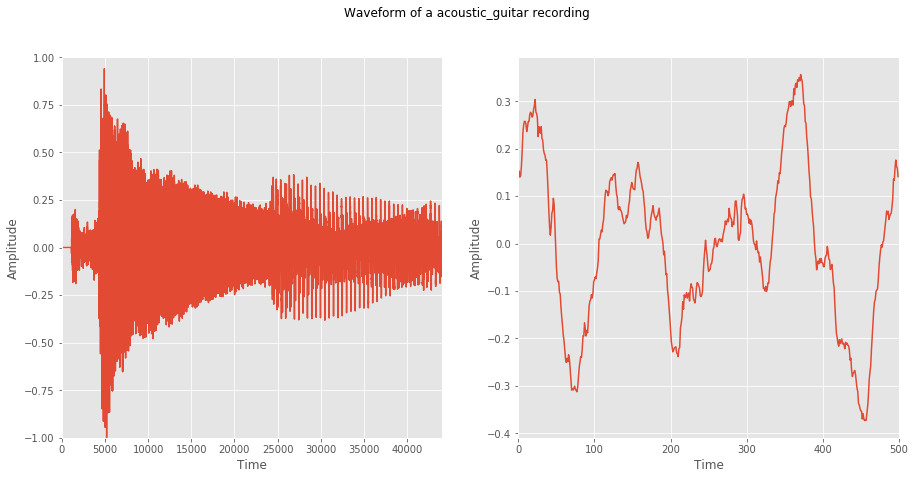

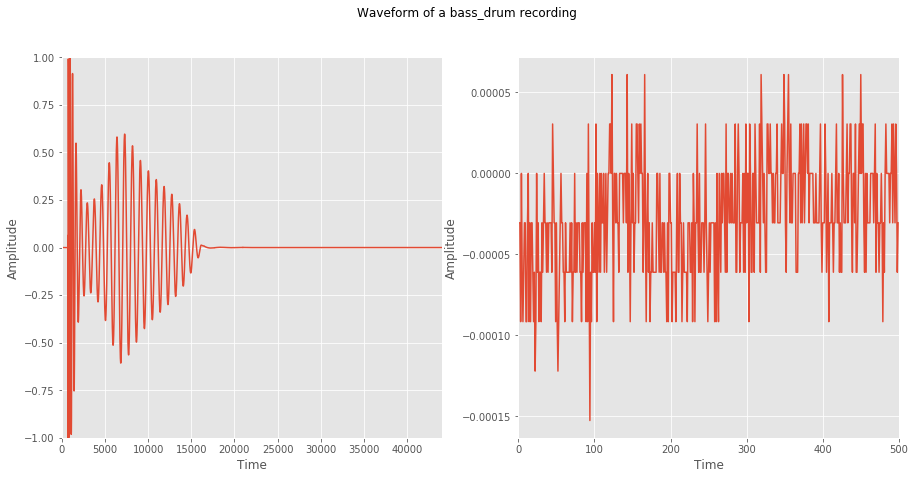

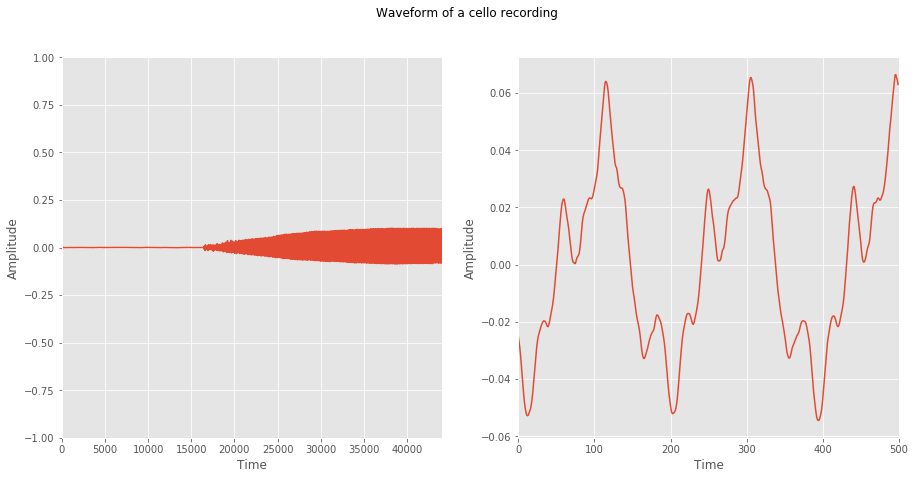

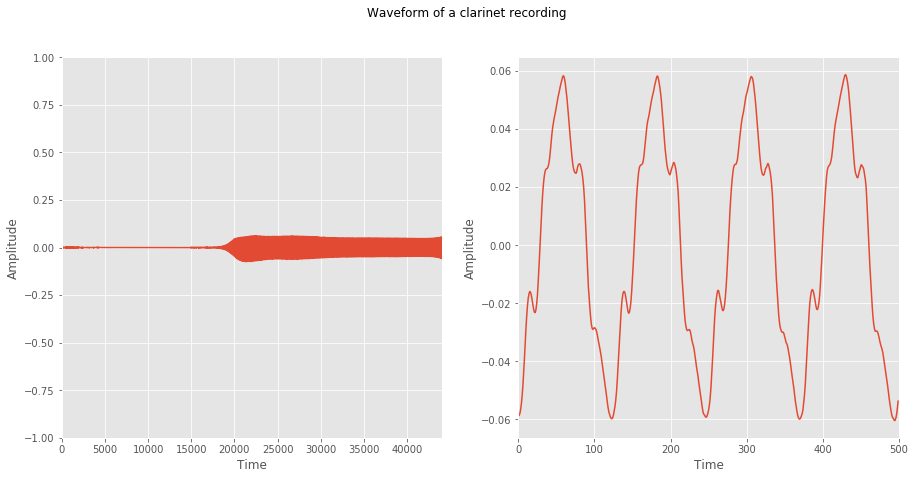

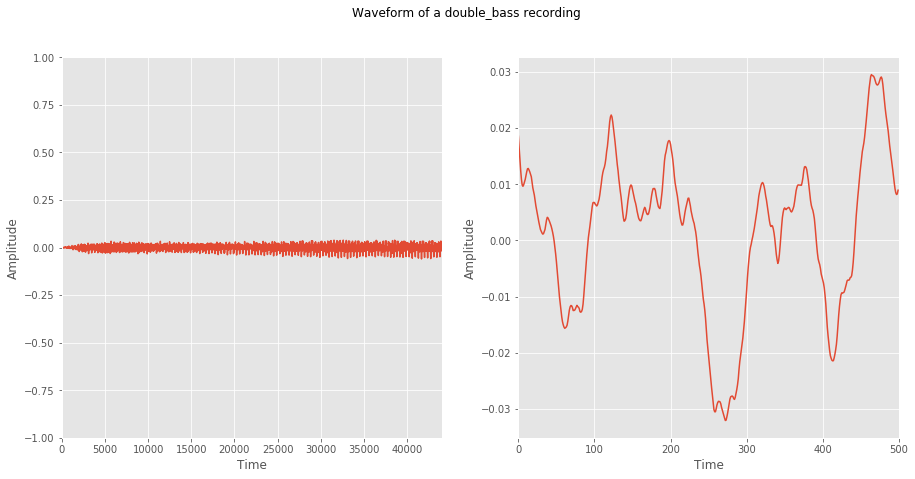

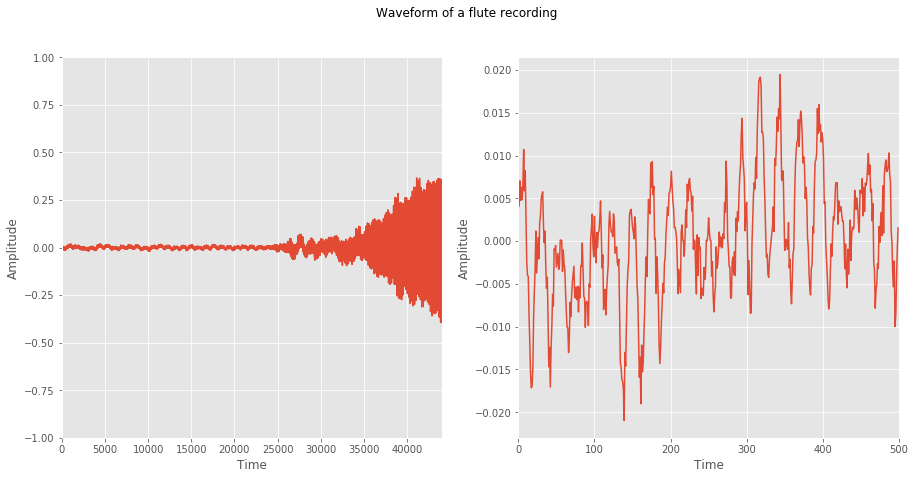

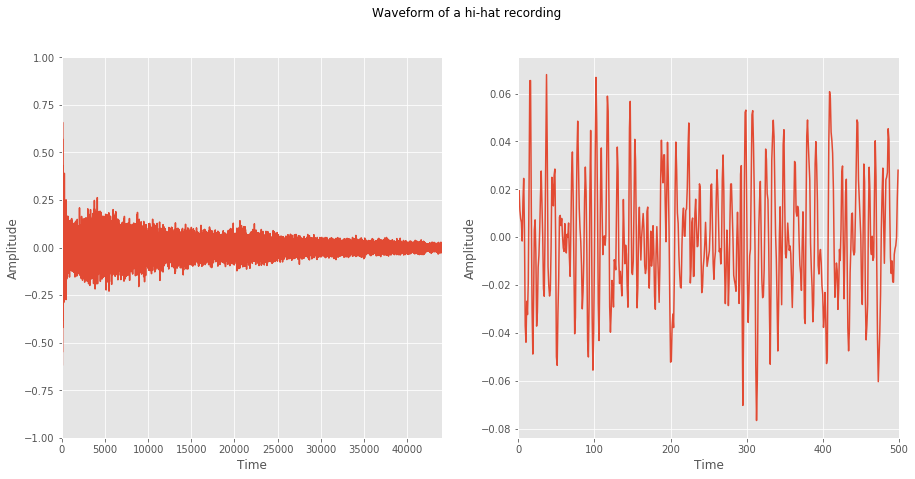

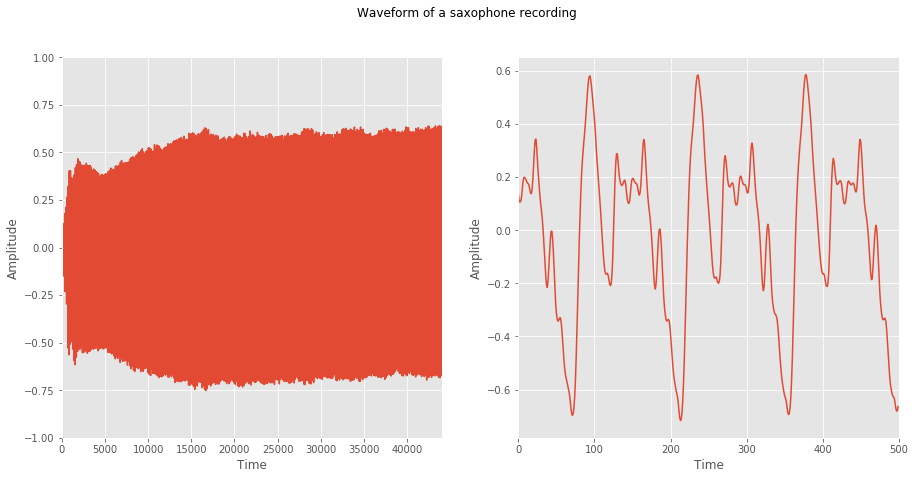

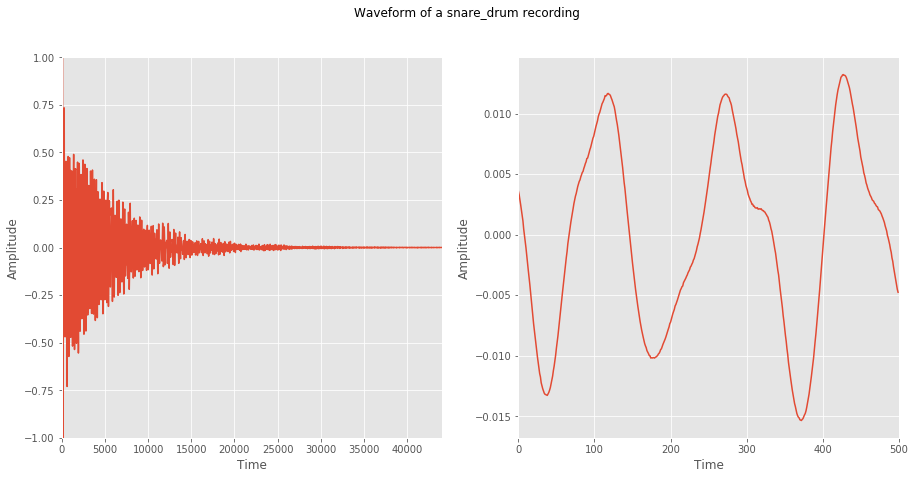

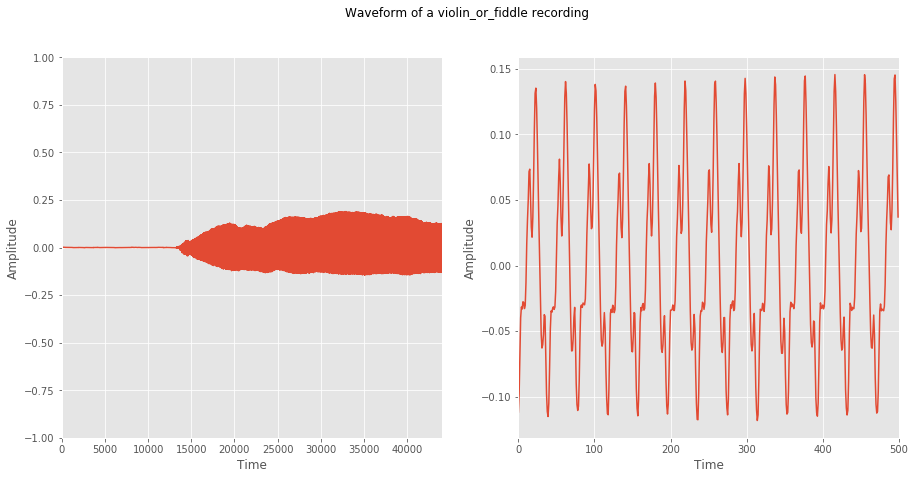

In [12]:
for instrument in np.unique(audio_data.label):
    plot_random_wave(instrument)